# SGD assignment 3

In [ ]:
# Dataset contains uber pickups in NYC from april to september 2014 and january to june 2015
#Link:
# easyjet.com/asp/EN/members/changeflightoptions.asp

# Base ->  TLC licensed business that dispatches TLC licensed for-hire vehicles

# Files we have

#   1) uber-raw-data-Month14 -> 6 files (1 per month) containing the following information:

#      Header	        Definition
#   Date/Time	    The date and time of the Uber pickup
#   Lat	            The latitude of the Uber pickup
#   Lon	            The longitude of the Uber pickup
#   Base	        The TLC base company code affiliated with the Uber pickup


#   2) uber-raw-data-janjune-15 contains the following information: 

#      Header	                Definition
# Dispatching_base_num	    The TLC base company code of the base that dispatched the Uber
# Pickup_date	            The date and time of the Uber pickup
# Affiliated_base_num	    The TLC base company code affiliated with the Uber pickup
# locationID	            The pickup location ID affiliated with the Uber pickup

# The Base codes are: 
# Base Code	  Base Name
# B02512	    Unter
# B02598	    Hinter
# B02617	    Weiter
# B02682	    Schmecken
# B02764	    Danach-NY
# B02765	    Grun
# B02835	    Dreist
# B02836	    Drinnen

#   3) Uber-jan-feb-FOIL contains the following information: 
# dispatching_base_number      date     active_vehicles        trips
# B02512                     1/1/2015        190                1132
# B02765                     1/1/2015        225                1765


# Ha mais ficheiros de Taxis e outras TLCs.

# Vou dividir agora 1 quadrado para cada coisa que deviamos fazer

In [ ]:
# Exploratory Data analysis

# Uber pickups divided by Base
# Uber pickups divided by day of week
# Uber pickups divided by hour of day
# Average rides per day | average ride per week

# Mark the pickups on a map
# Most frequent locations on HeatMap (Technique by tomas)

# Number of Uber pickups over time (Over the several days of the 6 months)

# Do Regression of the number of pickups over time

# Make sth with FOil file.. need to discuss what

## Imports

In [2]:
# Imports
from mpl_toolkits.mplot3d import Axes3D
from mpl_toolkits.basemap import Basemap
from geopy.geocoders import Nominatim
from sklearn.model_selection import train_test_split
import geopandas as gpd
import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
import statsmodels.formula.api as smf
import patsy

%matplotlib inline


## Reading Data

In [3]:
# Reading dataset
# Uncomment your path, don't rewrite on the reads
pwd = '/home/pedro/workspace/UC/4ano/2semestre/SGD/project/sgd/data'
#pwd = '/home/francisco/Desktop/College/Mestrado/1º Ano/2o Semestre/SGD/Assignment3/'
uber_april_14 = pd.read_csv(pwd + '/uber-tlc-foil-response-master/uber-trip-data/uber-raw-data-apr14.csv')
uber_may_14 = pd.read_csv(pwd + '/uber-tlc-foil-response-master/uber-trip-data/uber-raw-data-may14.csv')
uber_jun_14 = pd.read_csv(pwd + '/uber-tlc-foil-response-master/uber-trip-data/uber-raw-data-jun14.csv')
uber_jul_14 = pd.read_csv(pwd + '/uber-tlc-foil-response-master/uber-trip-data/uber-raw-data-jul14.csv')
uber_aug_14 = pd.read_csv(pwd + '/uber-tlc-foil-response-master/uber-trip-data/uber-raw-data-aug14.csv')
uber_sep_14 = pd.read_csv(pwd + '/uber-tlc-foil-response-master/uber-trip-data/uber-raw-data-sep14.csv')
lyft_aug_sep_14 = pd.read_csv(pwd + '/uber-tlc-foil-response-master/other-FHV-data/Lyft_B02510.csv')

In [10]:
taxi_april_14 = pd.read_csv(pwd + '/uber-tlc-foil-response-master/yellow_tripdata.csv')

FileNotFoundError: [Errno 2] File b'/home/pedro/workspace/UC/4ano/2semestre/SGD/project/sgd/data/yellow_tripdata.csv' does not exist: b'/home/pedro/workspace/UC/4ano/2semestre/SGD/project/sgd/data/yellow_tripdata.csv'

## Data treatment

In [4]:
# Merging all 6 months datasets
uber_14 = pd.concat([uber_april_14, uber_may_14, uber_jun_14, uber_jul_14, uber_aug_14, uber_sep_14])

# Prepare Uber data
uber_14['Date/Time'] = pd.to_datetime(uber_14['Date/Time'])
uber_14['Month'] = uber_14['Date/Time'].dt.month
uber_14['Day'] = uber_14['Date/Time'].dt.day
uber_14['Hour'] = uber_14['Date/Time'].dt.hour
uber_14['Week'] = uber_14['Date/Time'].dt.day_name()

In [8]:
# Prepara Lyft and corresponding Uber months datasets
uber_compare_14 = pd.concat([uber_aug_14, uber_sep_14])
uber_compare_14['Date/Time'] = pd.to_datetime(uber_compare_14['Date/Time'])
uber_compare_14['Month'] = uber_compare_14['Date/Time'].dt.month
uber_compare_14['Day'] = uber_compare_14['Date/Time'].dt.day
uber_compare_14['Hour'] = uber_compare_14['Date/Time'].dt.hour
uber_compare_14['Week'] = uber_compare_14['Date/Time'].dt.day_name()

In [9]:
lyft_aug_sep_14['time_of_trip'] = pd.to_datetime(lyft_aug_sep_14['time_of_trip'])
lyft_aug_sep_14['Month'] = lyft_aug_sep_14['time_of_trip'].dt.month
lyft_aug_sep_14['Day'] = lyft_aug_sep_14['time_of_trip'].dt.day
lyft_aug_sep_14['Hour'] = lyft_aug_sep_14['time_of_trip'].dt.hour
lyft_aug_sep_14['Week'] = lyft_aug_sep_14['time_of_trip'].dt.day_name()

In [ ]:
#Lyft vs Uber
# Week number of Lyft vs Uber
x = uber_compare_14.groupby(uber_compare_14['Week']).count()['Hour']
w = lyft_aug_sep_14.groupby(lyft_aug_sep_14['Week']).count()['Hour']
y = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']


# Creates Dataframe for plot
number_rides_weekday = pd.DataFrame({'Uber': x, 'Lyft': w}, index=y)
# Draws plot
number_rides_weekday.plot.bar(rot=70)


In [ ]:
#Lyft vs Uber
# Month number of Lyft vs Uber
x = uber_compare_14.groupby(uber_compare_14['Month']).count()['Hour']
w = lyft_aug_sep_14.groupby(lyft_aug_sep_14['Month']).count()['Hour'] 
# Necessary because Lyft has some 'outliers' of month 7
w = [w.values[1], w.values[2]]
y = ['August', 'September']


# Creates Dataframe for plot
number_rides_weekday = pd.DataFrame({'Uber': x.values, 'Lyft': w}, index=y)
# Draws plot
number_rides_weekday.plot.barh(rot=15)

In [ ]:
# Number of uber rides called per weekday

# Int array containing Numbers per week
x = uber_14.groupby(uber_14['Week']).count()['Hour']
# String array containing Weekdays
y = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']


# Creates Dataframe for plot
number_rides_weekday = pd.DataFrame({'Number of rides': x}, index=y)
# Draws plot
number_rides_weekday.plot.bar(rot=70, title='Number of uber rides per weekday', color="#FF6361")

In [ ]:
# Group by Base and Count

# Int array containing Numbers per Base
x = uber_14.groupby(uber_14['Base']).count()['Hour']

# String array containing Bases
y = ['B02512', 'B02598', 'B02617', 'B02682', 'B02764']
y_names = ['Unter', 'Hinter', 'Weiter', 'Schmecken', 'Danach']

colors = ["#003F5C", "#58508D", "#BC5090", "#FF6361", "#FFA600"]
# Pie Chart
plot.pie( x, labels=y_names, colors=colors, autopct='%1.1f%%')
#Aspect related options
plot.axis('equal')
plot.tight_layout()
plot.title('Uber rides Base')
plot.show()

In [ ]:
# Group by Month

x = uber_14.groupby('Month').count()['Week']
y = ['April', 'May', 'June', 'July', 'August', 'September']


# Creates Dataframe for plot
number_rides_weekday = pd.DataFrame({'Number of rides': x.values}, index=y)
# Draws plot
number_rides_weekday.plot.bar(rot=0, title='Number of uber rides per Month', color="#FF6361")

In [ ]:
# Group by Hours of Day
#uber_14.groupby(uber_14['Hour']).count()

uber_14.boxplot(column="Hour", vert=False, grid=False)
plot.title('Uber ride Hours')
plot.show()

In [5]:
# Group by Days of week and count

uber_14.groupby(uber_14['Week']).count()

,Date/Time,Lat,Lon,Base,Month,Day,Hour,Week
Week,,,,,,,,
Friday,741139,741139,741139,741139,741139,741139,741139,741139
Monday,541472,541472,541472,541472,541472,541472,541472,541472
Saturday,646114,646114,646114,646114,646114,646114,646114,646114
Sunday,490180,490180,490180,490180,490180,490180,490180,490180
Thursday,755145,755145,755145,755145,755145,755145,755145,755145
Tuesday,663789,663789,663789,663789,663789,663789,663789,663789
Wednesday,696488,696488,696488,696488,696488,696488,696488,696488


In [6]:
# Group by Base and Count
uber_14.groupby(uber_14['Base']).count()

,Date/Time,Lat,Lon,Month,Day,Hour,Week
Base,,,,,,,
B02512,205673,205673,205673,205673,205673,205673,205673
B02598,1393113,1393113,1393113,1393113,1393113,1393113,1393113
B02617,1458853,1458853,1458853,1458853,1458853,1458853,1458853
B02682,1212789,1212789,1212789,1212789,1212789,1212789,1212789
B02764,263899,263899,263899,263899,263899,263899,263899


In [ ]:
#Group by Day-Month (Ammount of rides a day).
x = uber_14.groupby([(uber_14['Month']), (uber_14['Day'])])['Day'].count()
#x = uber_14['Month'].values
x.keys


In [ ]:
#Average ride per day

avg_rides_per_day = uber_14.shape[0] / uber_14.groupby([(uber_14['Month']), (uber_14['Day'])]).size().shape[0]
avg_rides_per_day


# (Number of rides|Rows)
# uber_14.shape[0]  

# Number of Days
# uber_14.groupby([(uber_14['Month']), (uber_14['Day'])]).size().shape[0]


In [ ]:
#Average ride per week

avg_rides_per_day = uber_14.shape[0] / uber_14.groupby([(uber_14['Month']), (uber_14['Week'])]).size().shape[0]
avg_rides_per_day


# (Number of rides|Rows)
# uber_14.shape[0]  

# Number of Days
# uber_14.groupby([(uber_14['Month']), (uber_14['Day'])]).size().shape[0]

## Point Scatter and HeatMap

In [7]:
data_uber = {
        'Hour' : uber_compare_14['Hour'],
        'Lat' : uber_compare_14['Lat'],
        'Long' : uber_compare_14['Lon'],
        'Type' : '1'
}
data_lyft = {
        'Hour' : lyft_aug_sep_14['Hour'],
        'Lat' : lyft_aug_sep_14['start_lat'],
        'Long' : lyft_aug_sep_14['start_lng'],
        'Type' : '0'
}

test_uber = pd.DataFrame(data_uber)
test_lyft = pd.DataFrame(data_lyft)
test = pd.concat([test_uber, test_lyft])

# Point information
points = uber_april_14
gdf_listings = gpd.GeoDataFrame(points, geometry=gpd.points_from_xy(points["Lon"], points["Lat"]))

corr = test.corr()

print(corr)

Lat       Lon
Lat  1.000000  0.041692
Lon  0.041692  1.000000


Text(0.5, 1, 'Correlation Heatmap')

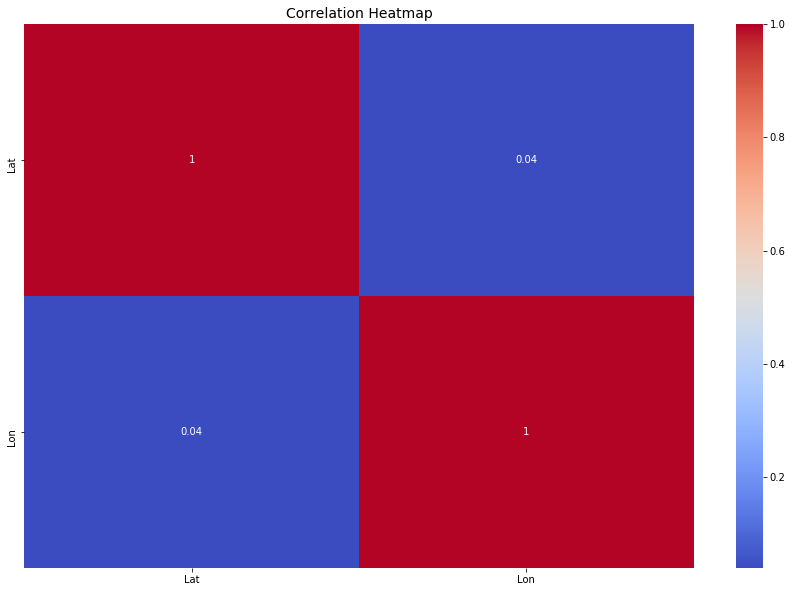

In [5]:
corr = uber_14.corr()
plt.figure(figsize=(15,10))
hm = sns.heatmap(round(corr,2), annot=True, cmap="coolwarm")

#to solve the top and bottom cut problem 
b, t = plt.ylim() # discover the values for bottom and top
b += 0.5 # Add 0.5 to the bottom
t -= 0.5 # Subtract 0.5 from the top
plt.ylim(b, t) # update the ylim(bottom, top) values

plt.title('Correlation Heatmap', fontsize=14)

In [5]:
# Map information
plz_shape_df = gpd.read_file(pwd + '/shapefile/test/nyu_2451_34505/nyu_2451_34505.shp', dtype={'plz': str})

plz_shape_df = plz_shape_df.to_crs(epsg=4326)

# Point information
points = uber_14
gdf_listings = gpd.GeoDataFrame(points, geometry=gpd.points_from_xy(points["Lon"], points["Lat"]))

gdf_listings.head(5)


,Date/Time,Lat,Lon,Base,Month,Day,Hour,Week,geometry
0,2014-04-01 00:11:00,40.7690,-73.9549,B02512,4,1,0,Tuesday,POINT (-73.95490 40.76900)
1,2014-04-01 00:17:00,40.7267,-74.0345,B02512,4,1,0,Tuesday,POINT (-74.03450 40.72670)
2,2014-04-01 00:21:00,40.7316,-73.9873,B02512,4,1,0,Tuesday,POINT (-73.98730 40.73160)
3,2014-04-01 00:28:00,40.7588,-73.9776,B02512,4,1,0,Tuesday,POINT (-73.97760 40.75880)
4,2014-04-01 00:33:00,40.7594,-73.9722,B02512,4,1,0,Tuesday,POINT (-73.97220 40.75940)


In [6]:
# Intercept
# points_fix = gdf_listings.loc[gdf_listings.is_valid]
sjoined_listings = gpd.sjoin(gdf_listings, plz_shape_df, op="within")

In [11]:
sjoined_listings.head()

,Date/Time,Lat,Lon,Base,Month,Day,Hour,Week,geometry,index_right,tractid,tractnum,name,namelsad,nta,nta_name,bcode
0,2014-04-01 00:11:00,40.7690,-73.9549,B02512,4,1,0,Tuesday,POINT (-73.95490 40.76900),1223,36061012400,012400,124,Census Tract 124,MN31,Lenox Hill-Roosevelt Island,36061
15,2014-04-01 02:31:00,40.7666,-73.9531,B02512,4,1,2,Tuesday,POINT (-73.95310 40.76660),1223,36061012400,012400,124,Census Tract 124,MN31,Lenox Hill-Roosevelt Island,36061
388,2014-04-01 12:57:00,40.7657,-73.9549,B02512,4,1,12,Tuesday,POINT (-73.95490 40.76570),1223,36061012400,012400,124,Census Tract 124,MN31,Lenox Hill-Roosevelt Island,36061
428,2014-04-01 13:40:00,40.7651,-73.9531,B02512,4,1,13,Tuesday,POINT (-73.95310 40.76510),1223,36061012400,012400,124,Census Tract 124,MN31,Lenox Hill-Roosevelt Island,36061
494,2014-04-01 14:57:00,40.7682,-73.9530,B02512,4,1,14,Tuesday,POINT (-73.95300 40.76820),1223,36061012400,012400,124,Census Tract 124,MN31,Lenox Hill-Roosevelt Island,36061


In [7]:
grouped = sjoined_listings.groupby("tractid").size()
df = grouped.to_frame().reset_index()
df.columns = ["tractid", "uber_count"]

In [8]:
merged_areas = plz_shape_df.merge(df, on="tractid", how="outer")

In [10]:
uber_14.count()

tractid       2164
tractnum      2164
name          2164
namelsad      2164
nta           2164
nta_name      2164
bcode         2164
geometry      2164
uber_count    2148
dtype: int64

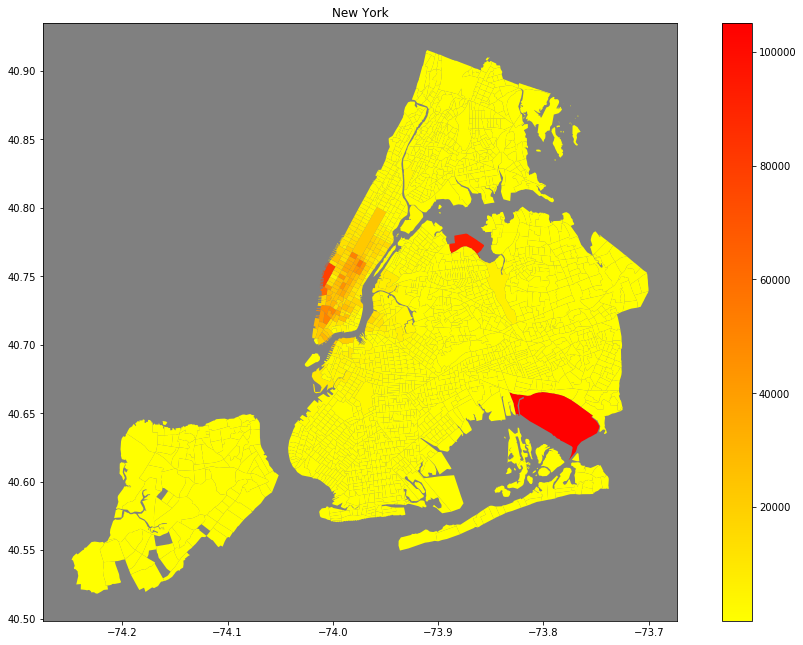

In [9]:
plt.rcParams['figure.figsize'] = [16, 11]

fig, ax = plt.subplots()

merged_areas.plot(ax=ax,
    column="uber_count", 
    categorical=False, 
    legend=True, 
    cmap='autumn_r',)

lat = uber_14['Lat'].values
lon = uber_14['Lon'].values


#ax.scatter(
#        lon, 
#        lat, 
#        marker='o',
#        c='black', 
#        alpha=0.5
#    )

ax.set(
    title='New York', 
    aspect=1.3, 
   facecolor='grey'
);

In [ ]:
# Pega nos ficheiros dos taxis|TLCs e comparar com Uber might be intersting.. Need help here

In [ ]:
# Serie Temporal e|ou Clustering ?!? 

## Logistic Regression

In [55]:
# Linear Regression (Linear)

# Fixing variables for Logistic Rregression

x = uber_14.groupby([(uber_14['Month']), (uber_14['Day'])])['Day'].count()
data = {
        'Date' : x.keys().to_numpy(),
        'Days' : range(1, x.keys().size+1),
        'Count' : x.values
}

X = data['Days']
X = sm.add_constant(X)
Y = data['Count']

model = sm.OLS(Y,X).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.459
Model:                            OLS   Adj. R-squared:                  0.456
Method:                 Least Squares   F-statistic:                     153.8
Date:                Thu, 21 May 2020   Prob (F-statistic):           5.80e-26
Time:                        00:35:26   Log-Likelihood:                -1824.6
No. Observations:                 183   AIC:                             3653.
Df Residuals:                     181   BIC:                             3660.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       1.647e+04    772.574     21.316      0.000    1.49e+04     1.8e+04
x1            90.3191      7.282     12.402      0.000      75.950     104.688
==============================================================================
Omnibus:                        0.488   Durbin-Watson:                   0.804
Prob(Omnibus):                  0.784   Jarque-Bera (JB):                0.217
Skew:                           0.030   Prob(JB):                        0.897
Kurtosis:                       3.158   Cond. No.                         213.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [66]:
x = uber_14.groupby([(uber_14['Month']), (uber_14['Day'])])['Day'].count()
data = {
        'Date' : x.keys().to_numpy(),
        'Days' : range(1, x.keys().size+1),
        'Count' : x.values
}

data['log_days'] = np.log(data['Days'])
X = data['log_days']
Y = data['Count']
F = 'log_Count~log_days'

model = sm.OLS(formula=F,endog=Y,exog=X).fit()
model.summary()


ValueError: 'log_Count' is not in list

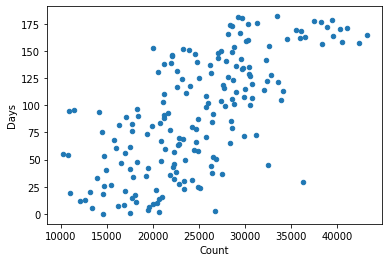

In [21]:
# Fixing variables for Logistic Rregression

x = uber_14.groupby([(uber_14['Month']), (uber_14['Day'])])['Day'].count()
data = {
        'Date' : x.keys().to_numpy(),
        'Days' : range(1, x.keys().size+1),
        'Count' : x.values
}
uber_logistic = pd.DataFrame(data=data)
uber_logistic.plot(kind='scatter', x='Count', y='Days')
plot.show()

In [5]:
# 20% data as test 
train, test = train_test_split(uber_logistic, test_size=0.2)
train.shape
#test.shape

(48, 2)

In [6]:
formula = "Count ~ C(Date)"
y_train,x_train = patsy.dmatrices(formula, data=train,return_type='dataframe')
y_test,x_test = patsy.dmatrices(formula, data=test,return_type='dataframe')

In [7]:
model = sm.Logit(y_train,x_train) 

res = model.fit() 

res.summary()

ValueError: endog must be in the unit interval.